<a href="https://colab.research.google.com/github/bhermus/CSC732_hw1/blob/main/Problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Find appropriate 2-D numerical dataset to implement DBSCAN.

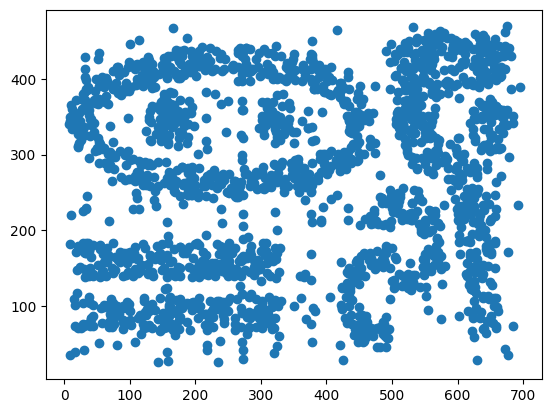

In [5]:
# CSC 732 Hw1 - Problem 3
# Ali Necdet Guvercin, Benjamin Hermus, Kehang Wei

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN, SpectralClustering

df = pd.read_csv("/content/chameleon.data", comment="@",  names=["X", "y"], delimiter=" ")

plt.scatter(df.get("X"), df.get("y"))
plt.show()

We chose a 2D dataset designed to exemplify the capabilities of the Chameleon algorithm, with a moderate amount of noise. Other example of its usage can be seen in [this paper](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=55ac541f59c6a865d33403c55188a0c13a6d79a7).

The data can be seen plotted above.

(a) Make 2 - 3 experiments with DBSCAN using different values for the two parameters.

Estimated number of clusters: 44
Estimated number of noise points: 400


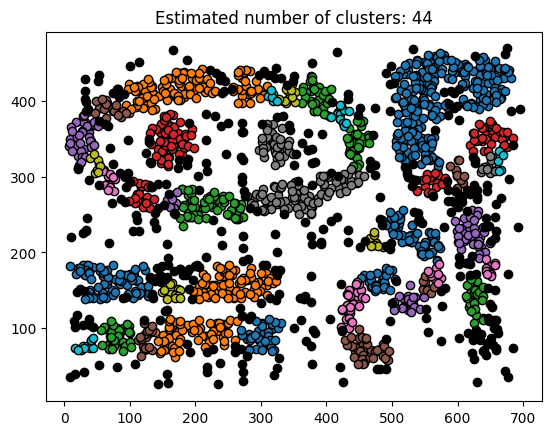

In [5]:
dbscan = DBSCAN(eps=15, min_samples=10)  # DBSCAN parameters set here
dbscan.fit(df)

labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.tab10(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = df[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
    )

    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

The initial DBSCAN experiment uses a radius of 15, and a minimum sample size of 10; the results are graphed above.

Estimated number of clusters: 10
Estimated number of noise points: 135


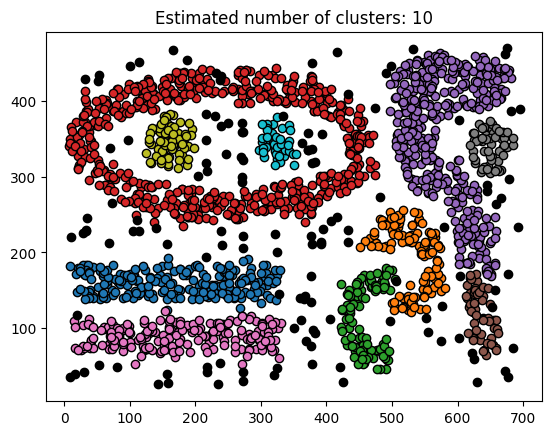

In [7]:
dbscan = DBSCAN(eps=15, min_samples=5)  # DBSCAN parameters set here
dbscan.fit(df)

labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.tab10(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = df[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
    )

    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

For the next experiment, we decreased the sample size required for a core point to 5.

Estimated number of clusters: 5
Estimated number of noise points: 77


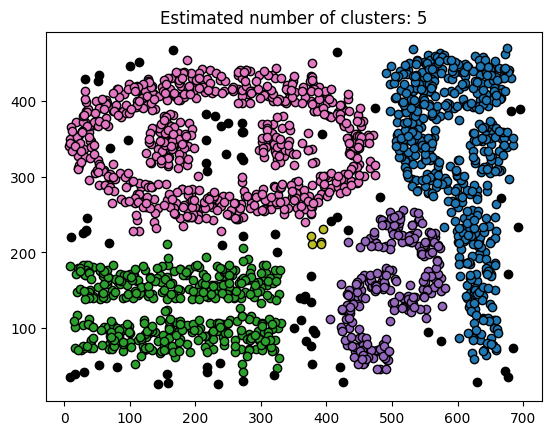

In [8]:
dbscan = DBSCAN(eps=20, min_samples=5)  # DBSCAN parameters set here
dbscan.fit(df)

labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.tab10(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = df[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
    )

    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

Finally, for the last experiemnt we increase the radius from 15 to 20.

(b) Make 3-4 experiments with Spectral Clustering using different values for RBF gamma parameter.

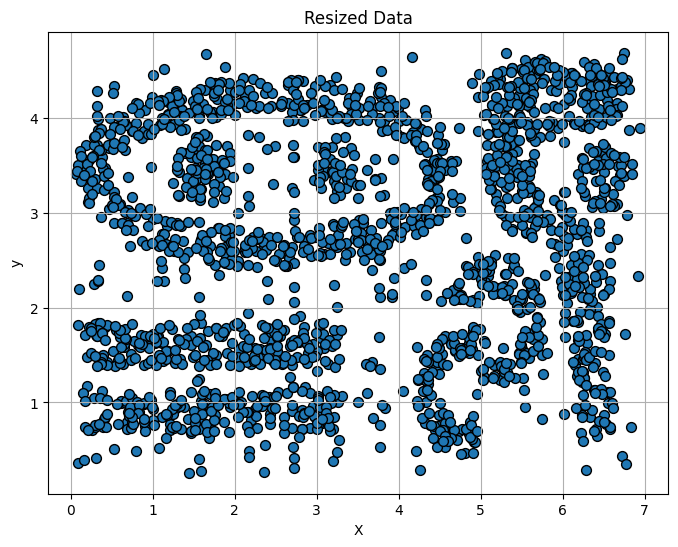

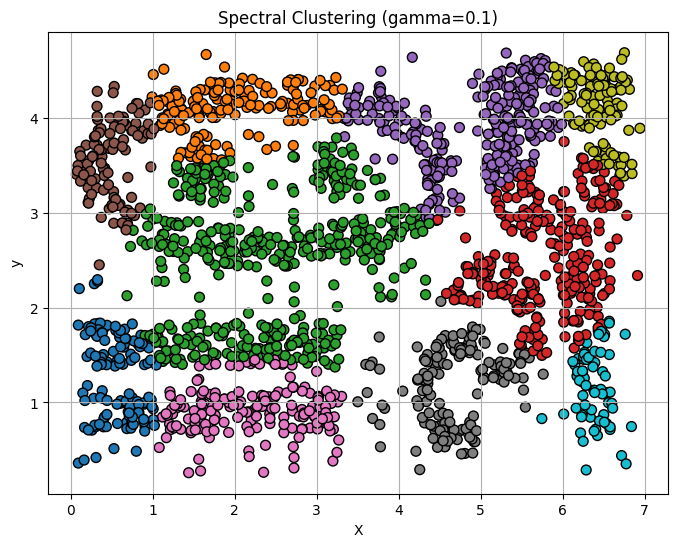

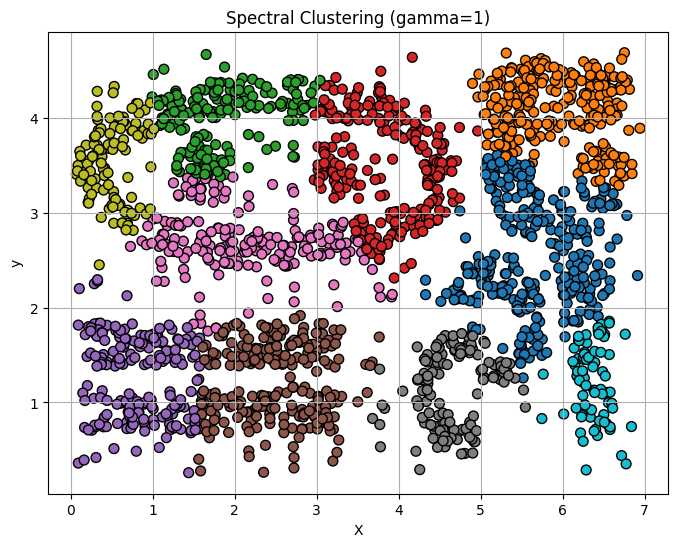

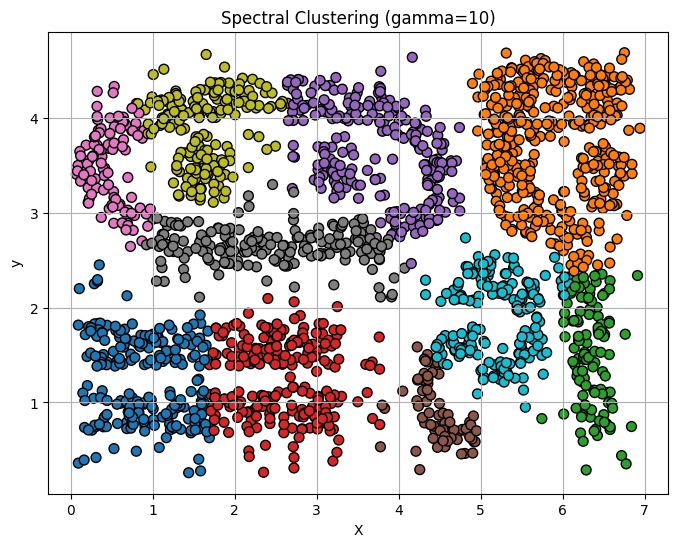

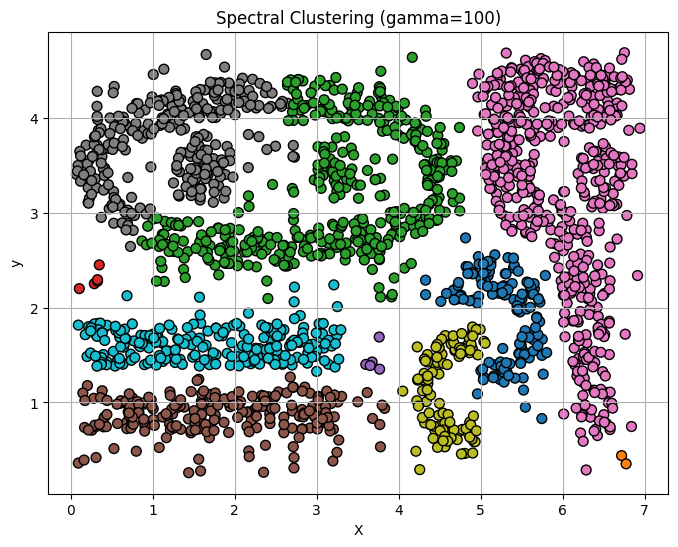

In [7]:
df = pd.read_csv("/content/chameleon.data", comment="@",  names=["X", "y"], delimiter=" ")

df = df.div(100)

# Plotting original data
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['y'], s=50, edgecolors="k")
plt.title("Resized Data")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Experimenting with different gamma values for Spectral Clustering
gamma_values = [0.1, 1, 10, 100]

for gamma in gamma_values:
    df_ = df.copy(deep=True)
    # Performing Spectral Clustering
    spectral_clustering = SpectralClustering(n_clusters=10, gamma=gamma, affinity='rbf', random_state=0)
    df_['cluster_label'] = spectral_clustering.fit_predict(df_)

    # labels = df['cluster_label'].

    # Plotting clustered data
    plt.figure(figsize=(8, 6))
    plt.scatter(df_['X'], df_['y'], c=df_['cluster_label'], s=50, cmap='tab10', edgecolors="k")
    plt.title(f"Spectral Clustering (gamma={gamma})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

To simplify the math, we resized our data, which can be seen above. Our RBF spectral clustering experiments are run with gamma=[0.1, 1, 10, 100].

The first experiments (output above) run with a target cluster number of 10.

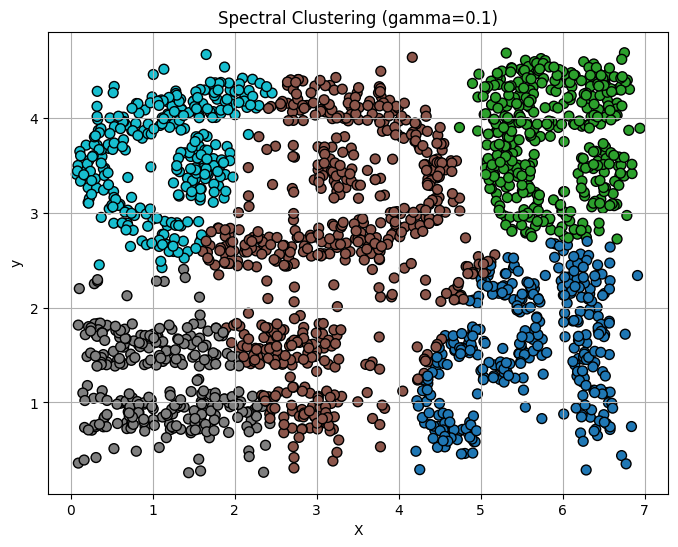

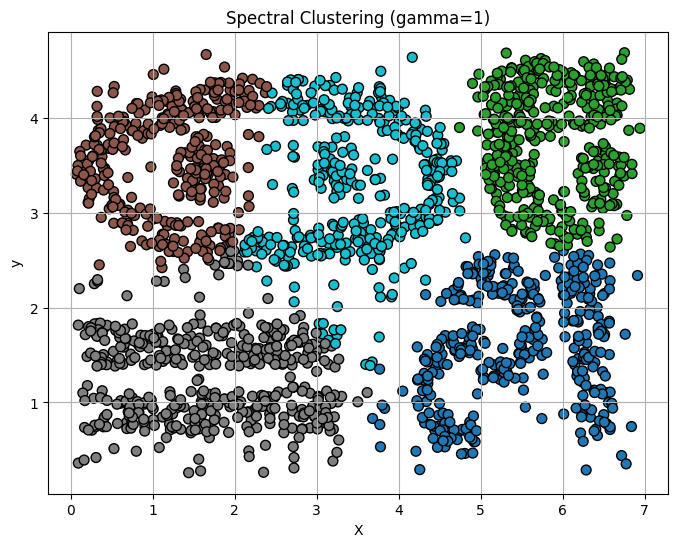

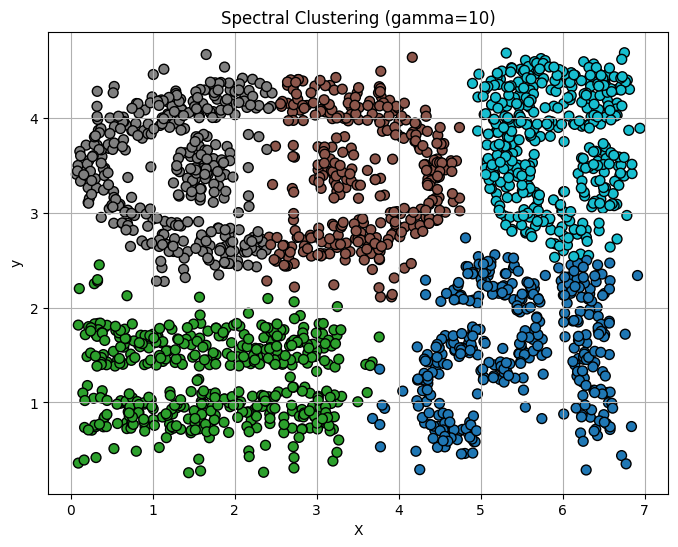

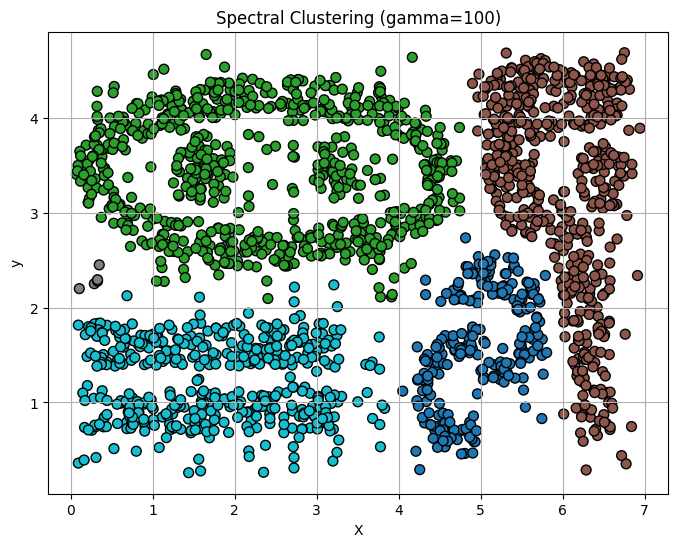

In [8]:
for gamma in gamma_values:
    df_ = df.copy(deep=True)
    # Performing Spectral Clustering
    spectral_clustering = SpectralClustering(n_clusters=5, gamma=gamma, affinity='rbf', random_state=0)  # Trying different target cluster number
    df_['cluster_label'] = spectral_clustering.fit_predict(df_)

    # labels = df['cluster_label'].

    # Plotting clustered data
    plt.figure(figsize=(8, 6))
    plt.scatter(df_['X'], df_['y'], c=df_['cluster_label'], s=50, cmap='tab10', edgecolors="k")
    plt.title(f"Spectral Clustering (gamma={gamma})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

For the next group of experiments, we ran with a target number of 5 (output above).

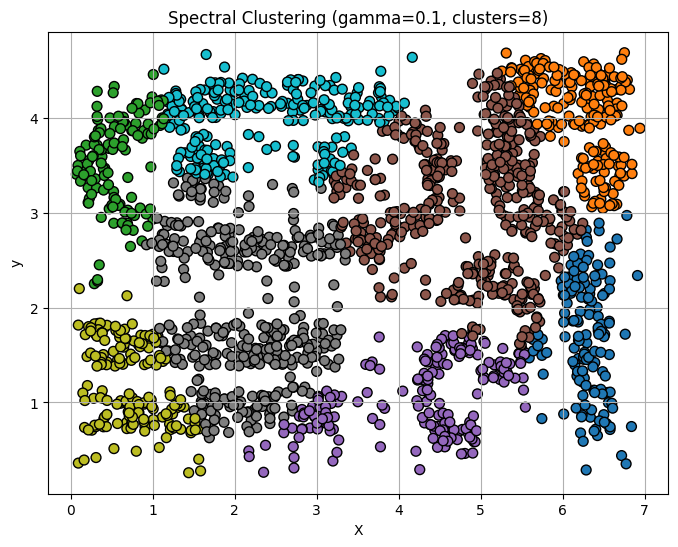

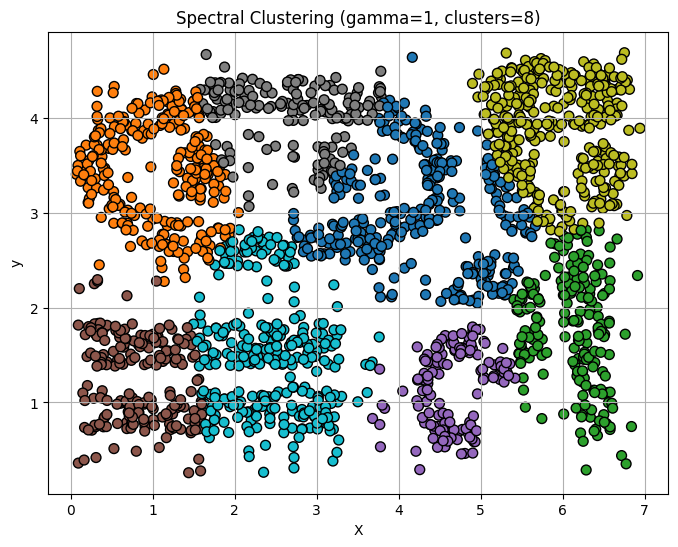

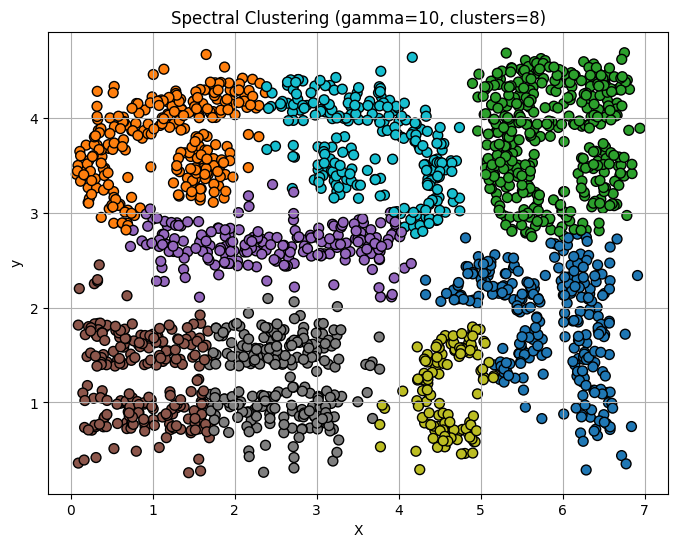

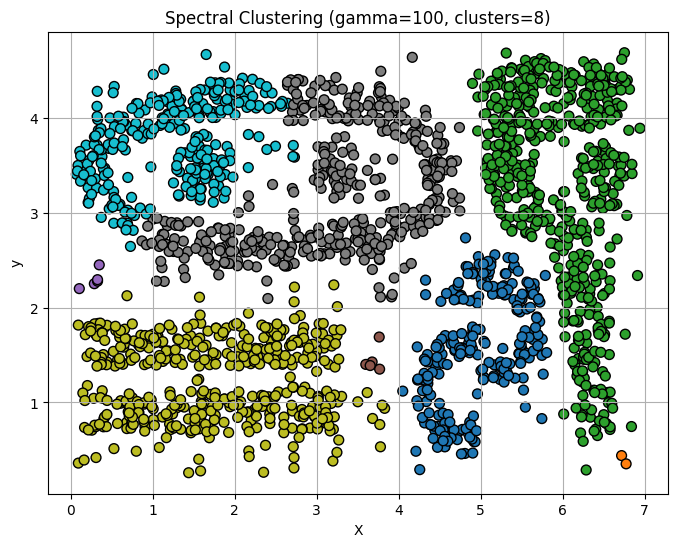

In [12]:
for gamma in gamma_values:
    df_ = df.copy(deep=True)
    # Performing Spectral Clustering
    spectral_clustering = SpectralClustering(gamma=gamma, affinity='rbf', random_state=0)  # Trying NO target cluster number
    df_['cluster_label'] = spectral_clustering.fit_predict(df_)

    num_labels = df_['cluster_label'].nunique()

    # Plotting clustered data
    plt.figure(figsize=(8, 6))
    plt.scatter(df_['X'], df_['y'], c=df_['cluster_label'], s=50, cmap='tab10', edgecolors="k")
    plt.title(f"Spectral Clustering (gamma={gamma}, clusters={num_labels})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

Finally, for the last RBF spectral clustering experiemnts, we allowed the algorithm to freely choose how many clusters to find.

# Analysis
##### **Dataset**
This dataset seemed particularly suited for clustering techniques more advanced than K-means. Looking at the initial plotted data, there are clear clusters visible to the human eye that would most likely fail with K-means clustering. We were particularly interested to see how the algorithms would handle clusters enclosed either fully or partially by other clusters, and clusters that seem distinct but could be perceived as connected due to outliers/noise.


##### **DBSCAN**
Our initial DBSCAN experiment did not seems to produce useful output. The estimated clusters was 44, and the graph shows many distinct clusters that appear as though they should be connected. We presumed that a sample size of 10 was too high, and the threshold for a point to be chosen as a core point was too strict.

For our second experiment, we reduced sample size from 10 to 5. This seemed to give excellent results, with the graphed data very closely resembling what we discerned as unique clusters.

In our final experiment, we increased the detection radius from 15 to 20. We felt these results were an excellent contrast to the previous experiment's. The plotted data shows very reasonable clustering, with the most notable difference being fewer clusters (i.e. distinctions from the previous experiment are no longer present). This made sense with our understanding of the radius parameter in DBSCAN; if each point is searching in a larger surrounding area, it follows that the clustering would not be as tight.


##### **RBF Spectral Clustering**
We quickly learned that running this algorithm on such large X,y coordinates overcomplicated the math unecessarily, and so we scaled our data down by a factor of 100.

Out of curiousity, we chose to conduct multiple groupings of experiments, using what we had learned from the DBSCAN clustering. For the first group, we ran the algorithm with 10 as the target number of clusters; for the second, we used 5; and for the third, we allowed the algorithm to choose. We did this because we felt DBSCAN's clustering was quite accurate to the ground truth, and we wanted to be able to compare our results of the two algorithms directly.

In each of the three groupings of experiments, as gamma increased the clustering became closer to what is observed by the human eye. Interestingly enough, this algorithm seemed to struggle with the outlier points in the data, often "ruining" clusters by placing too much importance on data that is likely noise. Considering that this algorithm must label every point, this was not unexpected. We also found that the algorithm performed the best when we told it to find 5 clusters. Looking at the plotted data, this is reasonable, as RBF Spectral Clustering had difficulty with clusters surrounded by other clusters.

##### **Comparison**
We felt that for our dataset, DBSCAN performed noticably better. We attribute this to the consideration of outliers built into the algorithm itself; where DBSCAN saw points that were not relavent, Spectral Clustering treated them as important data. Generally speaking, this is not an issue, just a matter of usecase. For these particular experiemnts, where the data itself was less critical than testing the algorithms themselves, it seems that DBSCAN's ability to ignore certain data is invaluable.